Epoch 1/100
277/277 [==============================] - 13s 16ms/step - loss: 7.3237e-05 - val_loss: 4.8471e-05
Epoch 2/100
 13/277 [>.............................] - ETA: 2s - loss: 1.3912e-05

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


277/277 [==============================] - 3s 9ms/step - loss: 1.6681e-05 - val_loss: 1.8599e-04
Epoch 3/100
277/277 [==============================] - 3s 9ms/step - loss: 1.7015e-05 - val_loss: 4.5328e-05
Epoch 4/100
277/277 [==============================] - 3s 9ms/step - loss: 1.4063e-05 - val_loss: 3.6450e-04
Epoch 5/100
277/277 [==============================] - 3s 11ms/step - loss: 1.8146e-05 - val_loss: 3.2316e-04
Epoch 6/100
39/39 [==============================] - 1s 4ms/step


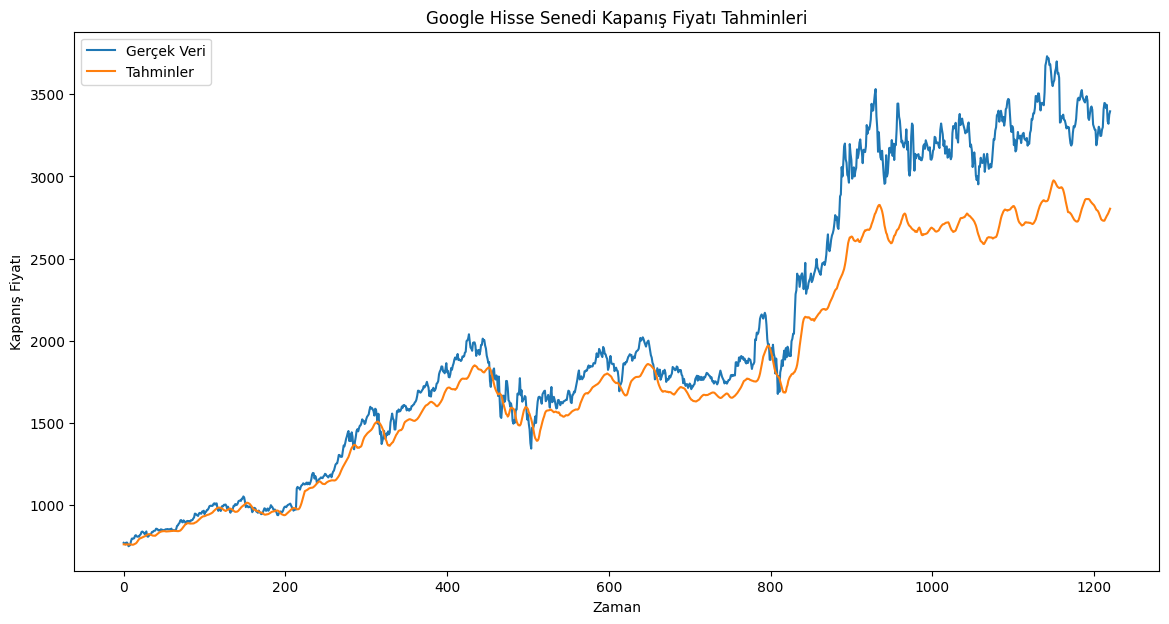

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

data = pd.read_csv("Amazon.csv")
data = data['Close'].values.reshape(-1,1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

train_data = scaled_data[:int(0.8*len(scaled_data))]
test_data = scaled_data[int(0.8*len(scaled_data)):]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]
X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]

# Early Stopping ve Model Checkpoint geri çağırımlarını tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Model oluşturma ve eğitme
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(150, input_shape=(seq_length, 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(150, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(150, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(150),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stopping, model_checkpoint])

# Tahminler yapma
predictions = model.predict(X_test)

# Tahminleri gerçek verilerle karşılaştırma
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(y_test), label='Gerçek Veri')
plt.plot(scaler.inverse_transform(predictions), label='Tahminler')
plt.title('Google Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.xlabel('Zaman')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()
